<a href="https://colab.research.google.com/github/celestecastro15/Seminario_MachineLearning/blob/main/ProyectoFinal/Clasificaci%C3%B3n_multiclase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación multiclase
## Seminario de Machine Learning: Proyecto Final
### Integrantes:

*   Castro Granados Celeste
*   Valdez Astudillo Almendra María




En este notebook se entrenará una red neuronal construida en `keras (tensorflow)` para realizar una clasificación de imágenes variadas, específicamente de imágenes de medios de transporte y animales, como aviones o gatos. 

Empecemos importando las librerías y paqueterías necesarias:

In [ ]:
import tensorflow as tf
from tensorflow import keras



from tensorflow.keras import layers

#Librerías de apoyo
import numpy as np
import matplotlib.pyplot as plt

## Importación del dataset

Se trabajará con el dataset conocido como [CIFAR10](https://keras.io/api/datasets/cifar10/), el cual consta de 50,000 (32x32) imágenes de entrenamiento a color y 10,000 imágenes de prueba también a color, etiquetadas en 10 clases. Este dataset ya se encuentra cargado en keras, por lo que podemos acceder directamente desde ahí.  

In [ ]:
dataset= keras.datasets.cifar10 #variable que contendrá el dataset

#definición de los conjuntos de entrenamiento y prueba con sus respectivas etiquetas 
(train_images, train_labels), (test_images, test_labels) = dataset.load_data() 

170508288/170498071 [==============================] - 4s 0us/step


Como se trata de imágenes a color, la dimensión de las imágenes será de 3 puesto que siguen el formato RGB, i.e. cada dimensión corresponderá a uno de estos canales, cuyos valores de pixel irán de 0 a 255. 

Por otro lado, las etiquetas serán enteros del 0 al 9, ya que se tienen 10 clases distintas, las cuales mostramos a continuación:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>avión</td>
  </tr>
  <tr>
    <td>1</td>
    <td>carro</td>
  </tr>
    <tr>
    <td>2</td>
    <td>pájaro</td>
  </tr>
    <tr>
    <td>3</td>
    <td>gato</td>
  </tr>
    <tr>
    <td>4</td>
    <td>ciervo</td>
  </tr>
    <tr>
    <td>5</td>
    <td>perro</td>
  </tr>
    <tr>
    <td>6</td>
    <td>rana</td>
  </tr>
    <tr>
    <td>7</td>
    <td>caballo</td>
  </tr>
    <tr>
    <td>8</td>
    <td>barco</td>
  </tr>
    <tr>
    <td>9</td>
    <td>camión</td>
  </tr>
</table>

Cada imagen será mapeada a una única etiqueta y antes de empezar es importante almacenar los nombres de las clases en una variable debido a que no están incluidos en el dataset.

In [ ]:
class_names = ['avion', 'carro', 'pajaro', 'gato', 'ciervo','perro', 'rana', 'caballo', 'barco', 'camion']

## Exploración del dataset

Previo a entrenar el modelo es importante conocer un poco los datos, veamos algunas características de nuestro dataset, empezando con el conjunto de entrenamiento:




In [ ]:
#forma del conjunto de entrenamiento
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images[0].shape

(32, 32, 3)

In [ ]:
#longitud/tamaño
len(train_labels)

50000

Vemos que tenemos 50, 000 imagenes, cada una de 32x32 pixeles y 3 canales. Veamos ahora la forma de las etiquetas:

In [ ]:
#etiquetas del conjunto de entrenamiento
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


Como dijimos cada etiqueta es un entero entre 0 y 9, sin embargo vemos que el conjunto de etiquetas está estructurado como un arreglo de listas con un solo elemento, por lo que vamos a redefinirlo de tal manera que contenga solo los números por si más adelante lo necesitamos de esa forma:



In [ ]:
#definimos una lista donde guardaremos sólo los números asociados a las etiquetas y la vamos llenando con un for
train_labels_final=[]
for i in range(len(train_labels)):
  train_labels_final.append(train_labels[i][0])

#una vez llena, convertimos la lista a un array de numpy
train_labels_final = np.array(train_labels_final)
print(train_labels_final)

[6 9 9 ... 9 1 1]


Y repetimos lo anterior ahora para ver el conjunto de prueba:

In [ ]:
#forma del conjunto de prueba
test_images.shape

(10000, 32, 32, 3)

In [ ]:
#etiquetas del conjunto de prueba

print(test_labels)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
#redefinición del conjunto de etiquetas de prueba
test_labels_final=[]
for i in range(len(test_labels)):
  test_labels_final.append(test_labels[i][0])

test_labels_final = np.array(test_labels_final)
print(test_labels_final)

[3 8 8 ... 5 1 7]


Finalmente graficamos una de las imagenes de entrenamiento para ver como es:

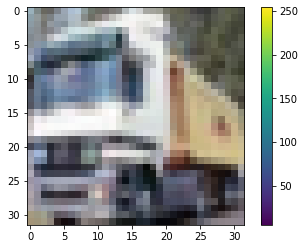

In [ ]:
#Utilizamos matplotlib para graficar
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

Esta imagen por ejemplo, corresponde a un camión.

## Pre-procesamiento del dataset

Un paso preliminar es realizar el preprocesamiento de los imágenes antes de ingresarlas a la red. Esto se hace buscando su acondicionamiento con el fin de garantizar la extracción de características por parte de la red. Es importante que el conjunto de entrenamiento y el de prueba se pre-procesen de la misma forma. 

Empezaremos con una normalización de los valores de los pixeles:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Y para asegurarnos de que el dataset está en el formato adecuado y de que está listo para construir y entrenar la red, vamos a mostrar las primeras 25 imagenes del conjunto de entrenamiento y el nombre de cada clase debajo de cada imagen.

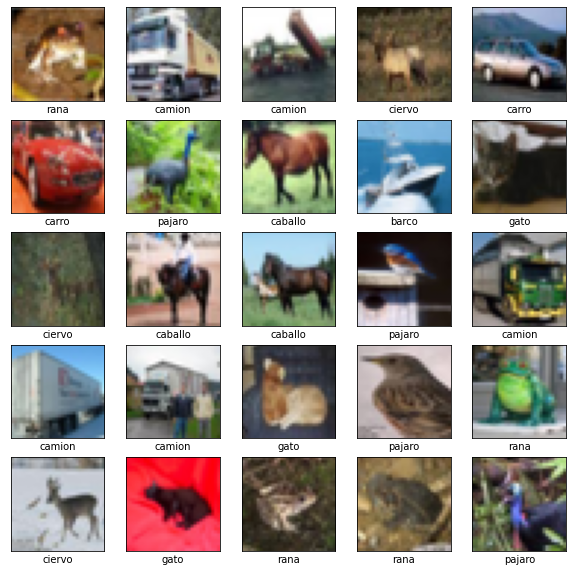

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_final[i]])
plt.show()

## Construcción del Modelo

Una vez listo el dataset pasamos al modelo. Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo. Empecemos con la configuración de las capas.

### Configuración de las Capas

Los bloques de construccion básicos de una red neuronal son las *capas* o *layers*. Las capas extraen características del dataset que las alimenta. La mayoría de las capas tienen parámetros que son aprendidos durante el proceso de entrenamiento. 

Para definir nuestro modelo tomaremos como referencia la red neuronal convolucional definida por fchollet en el capítulo "Introduction to deep learning for computer vision" de su libro ([click aquí](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter08_intro-to-dl-for-computer-vision.ipynb)), ajustando solo algunos parámetros para que funcione con el tamaño de nuestras imágenes.

In [ ]:
#shape del tamaño de las imágenes
inputs = keras.Input(shape=(32, 32, 3)) 

#El 'filters' es la dimensión del espacio de outputs (salidas),
# ' activation="relu" ' es la aplicación lineal de la función de activación Rectifier Linear Unit, ie, f(x)=max(0,x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x) 

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x) 

#'10' es la dimensión del espacio de outputs (salidas),
#' activation="softmax" ' aplica la función de activación de tal forma que conecta la capa de salida final.
outputs = layers.Dense(10, activation="softmax")(x) 

#Se especifican los datos de entrada (inputs) y de salida (outputs) que ya especificamos.
model = keras.Model(inputs=inputs, outputs=outputs) 

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

La primera capa corresponde a una capa de convolución, este tipo de capas consisten en tomar «grupos de pixeles cercanos» de la imagen de entrada e ir operando matemáticamente (producto escalar) contra una pequeña matriz que se llama kernel.  Ese kernel logra «visualizar» todas las neuronas de entrada (de izquierda-derecha, de arriba-abajo) y así logra generar una nueva matriz de salida, que será la nueva capa de neuronas ocultas.

Asimismo se incluyeron capas de MaxPooling con un tamaño de 2×2.  Esto quiere decir que recorreremos cada una de las imágenes de características obtenidas anteriormente de izquierda-derecha, arriba-abajo PERO en vez de tomar de a 1 pixel, tomaremos de «2×2» (2 de alto por 2 de ancho = 4 pixeles) e iremos preservando el valor «más alto» de entre esos 4 pixeles (por eso lo de «Max»).  En este caso, usando 2×2, la imagen resultante es reducida «a la mitad» pero sigue almacenando la información más importante para detectar características deseadas.

Finalmente, la capa de Flatten "aplasta" todos los valores para que puedan ser introducidos en la última capa (capa densa), la cual será la encargada de arrojar el resultado final. 

### Compilación del modelo

Antes de que el modelo esté listo para ser entrenado, se necesitan especificar algunas configuraciones durante el paso de compilación. El optimizador que se ocupará será `adam`, el cual actualiza con base las imágenes y la función de pérdida de memoria; como función de pérdida de memoria (loss) usaremos `sparse_categorical_crossentropy` puesto que se trata de un problema de clasificación multiclase, y la métrica utilizada será el `accuracy`. 


In [ ]:
#compilación con el método .compile()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Para entrenar el modelo de la red neuronal se hacen los siguientes pasos:

1. Entrega de los elementos del conjunto de entrenamiento al modelo. El conjunto de entrenamiento está en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imagenes y etiquetas.
3. El modelo hace predicciones sobre el dataset, incluido en `test_images` y las predicciones son iguales a las etiquetas del arreglo `test_labels`.

Se usa el método `model.fit`, que *ajusta* el modelo en el conjunto de entrenamiento:

In [ ]:
#Se entrenará durante 10 épocas
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4719 - accuracy: 0.4704
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.0855 - accuracy: 0.6188
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9377 - accuracy: 0.6723
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8453 - accuracy: 0.7056
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7745 - accuracy: 0.7334
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7149 - accuracy: 0.7539
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6692 - accuracy: 0.7688
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6203 - accuracy: 0.7845
Epoch 9/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.5796 - accuracy: 0.7983
Epoch 10/10
1563/1563 [==============================] - 69s 44m

Vemos que nuestro modelo ajustó al set de entrenamiento con un accuracy de 80.94%.

## Evaluar Exactitud

Para evaluar la exactitud de nuestro modelo vamos a ocupar el método `.evaluate(a,b,verbose)`, en donde `a` corresponde a `test_images`, `b` a `test_labels` y `verbose (0,1,2)` indica simplemente cómo se desea "ver" el progreso del entrenamiento para cada época:

* verbose=0- no muestra nada (silencioso)

* verbose=1- muestra una barra de progreso animada 

* verbose=2- menciona el número de época

Nota: El punto de evaluar utilizando el set de prueba es observar el comportamiento del modelo en imágenes que nunca ha visto. 

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 0.8831 - accuracy: 0.7191 - 4s/epoch - 13ms/step


Entonces el `accuracy` para el conjunto de test es el siguiente: 




In [ ]:
print('Test de exactitud = ', test_acc)

Test de exactitud =  0.7190999984741211


Reecapitulando:

```
# Test de exactitud en el set de prueba: 71.90%
```


```
# Test de exactitud en el set de entrenamiento: 80.94%
```

Esta diferencia entre el conjunto de entrenamiento y el de prueba se debe al *overfitting* (sobre ajuste).
Cuando entrenamos nuestro modelo intentamos “hacer encajar” (fit) los datos de entrada entre ellos y con la salida. El sobreajuste hace referencia al fallo de nuestro modelo al generalizar el conocimiento que pretendemos que adquieran.


## Hacer predicciones

Después de tener al modelo entrenado ya se pueden hacer predicciones sobre imágenes.

In [ ]:
predicciones = model.predict(test_images)

En la celda anterior el modelo ha predicho la etiqueta para cada imagen del set de prueba. Miremos la segunda predicción:

In [ ]:
predicciones[1]

array([1.0683586e-02, 6.7753266e-03, 8.4815230e-09, 1.5398994e-09,
       1.2069992e-09, 7.8979193e-12, 5.4637874e-11, 4.0792381e-10,
       9.8250520e-01, 3.5804183e-05], dtype=float32)

Observamos que una predicción es un arreglo de 10 números que representan el nivel de "confianza" del modelo sobre las imágenes de cada una de los 10 clases, i.e. la probabilidad que tiene la imagen de pertenecer a cada clase. Veamos por lo tanto cual es el valor más alto:

In [ ]:
np.argmax(predicciones[1])

8

Entonces, el modelo tiene mayor confianza de que esta imagen es un **barco** (class_names[8]). Examinando las etiquetas originales del set de *test* comprobamos que esta clasificación es correcta:

In [ ]:
test_labels_final[1]

8

A continuación vamos a graficar todas las predicciones, para lo cual definimos primero dos funciones: 

In [ ]:
#Primero haremos la gráfica de las imágenes 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

#Posteriormente hacemos la gráfica de las etiquetas
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#De tal forma que dependiendo de la gráfica de las imágenes será la gráfica de etiquetas que tendremos.
#La gráfica de etiquetas será una grafíca de barras, azul si las predicciones son del 100% y roja en otro caso con todas las predicciones.

Miremos las predicciones de la imagen [0],

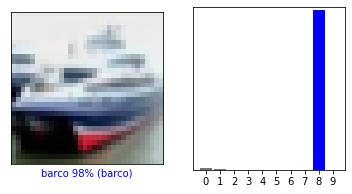

In [ ]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], test_labels_final, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  test_labels_final)
plt.show()

Miremos las predicciones de la imagen [12]

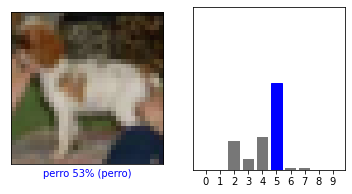

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predicciones[i], test_labels_final, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predicciones[i],  test_labels_final)
plt.show()

Y vamos a graficar también múltiples imágenes con sus predicciones. 

Notemos que el modelo puede estar equivocado aún cuando se tenga mucha confianza en la predicción. Esto se debe a que el error mostrado tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha “visto”. Si bien estos errores son útiles para entender cómo está aprendiendo el modelo, no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones (el error de entrenamiento suele ser demasiado optimista).

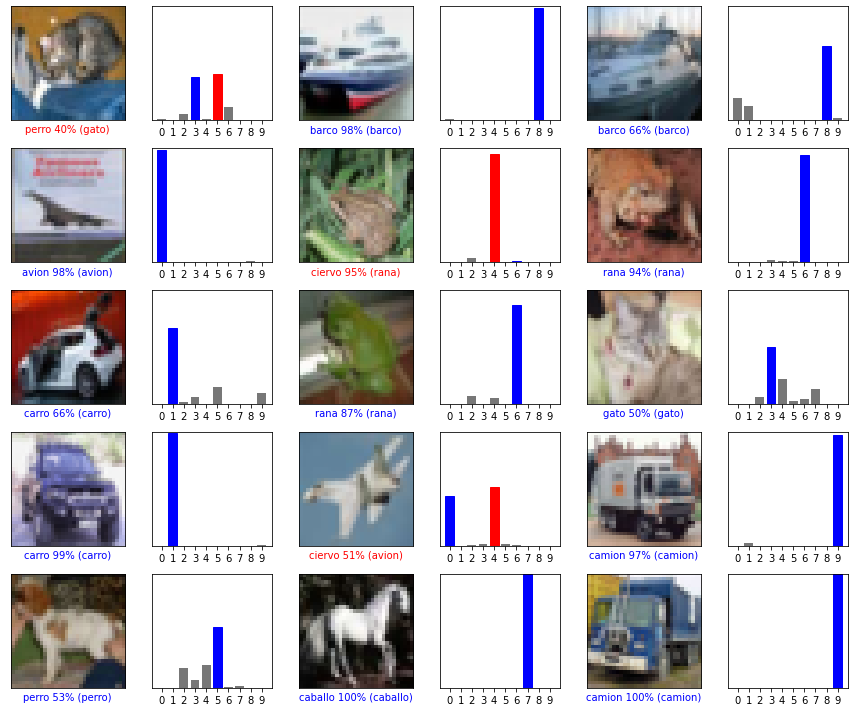

In [ ]:
# Graficaremos las primeras X imágenes del set de prueba, se van a predecir sus etiquetas y a indicar cuáles son ciertas
#Las predicciones correctas son color azul, mientras que las incorrectas son rojas.

#Definimos el número de filas y columnas que tendremos en la gráfica
num_rows = 5
num_cols = 3

#Hacemos la gráfica con el número de columnas y filas
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

#Para cada unidad en la gráfica vamos a hacer su imagen[i] correspondiente al dataset
#y para cada imagen[i] vamos a hacer su predicción.
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predicciones[i], test_labels_final, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predicciones[i], test_labels_final)
plt.tight_layout()
plt.show()

Ahora usamos el modelo entrenado para hacer una prediccion sobre una única imagen:

In [ ]:
# Vamos a revisar la imagen[1] del dataset
img = test_images[1]

print(img.shape)

(32, 32, 3)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones.
De acuerdo a esto, aunque use sólo una imagen hay que agregarla a una lista:

In [ ]:
# La agregamos a un bloque, en donde es el único elemento.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


Luego el modelo predice la etiqueta correcta para esta imagen:

In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.0683611e-02 6.7753526e-03 8.4815559e-09 1.5398994e-09 1.2070038e-09
  7.8979505e-12 5.4638082e-11 4.0792614e-10 9.8250520e-01 3.5804285e-05]]


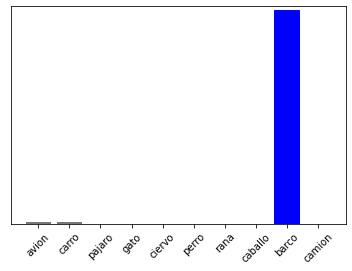

In [ ]:
plot_value_array(1, predictions_single[0], test_labels_final)
_ = plt.xticks(range(10), class_names, rotation=45)

Por lo tanto, la predicción para nuestra imagen es la siguiente:

In [ ]:
np.argmax(predictions_single[0])

8

Es decir, la imagen corresponde a un barco.

Finalmente calcuamos la matriz de confusión para saber con precisión cuantas predicciones fueron correctas:

In [ ]:
#Construcción de un arreglo con la clase predicha en cada caso (números enteros) para poder calcular la matriz de confusión
predicciones_array=[]
for i in range(len(predicciones)):
  predicciones_array.append(np.argmax(predicciones[i]))

predicciones_array = np.array(predicciones_array)
print(predicciones_array)

[5 8 8 ... 5 4 7]


In [ ]:
#Cálculo de la matriz de confusión
matriz_confusion = tf.math.confusion_matrix(test_labels_final, predicciones_array,num_classes=10)
print(matriz_confusion)

tf.Tensor(
[[808  28  33   7  31   3   5  16  44  25]
 [ 22 882   7   2   7   3   9   3  14  51]
 [ 73  11 619  31  96  61  65  25   9  10]
 [ 32  21  85 372 112 180 110  51  16  21]
 [ 21   6  51  28 735  26  52  68  10   3]
 [ 19   4  62 108  74 617  41  56  10   9]
 [  4   9  53  19  59  16 819  10   8   3]
 [ 16   4  24  23  74  55   7 782   5  10]
 [101  33  13   6   9   7   6   4 795  26]
 [ 40 120   8   6   7   8   8  15  26 762]], shape=(10, 10), dtype=int32)


Por lo tanto, la cantidad de predicciones correctas fue la siguiente:

In [ ]:
pred_correctas= np.sum(np.diagonal(matriz_confusion))
pred_incorrectas=len(test_images)-pred_correctas
print("Total de imágenes: ", len(test_images))
print("Total de predicciones correctas: ",pred_correctas)
print("Total de predicciones incorrectas: ",pred_incorrectas)

Total de imágenes:  10000
Total de predicciones correctas:  7191
Total de predicciones incorrectas:  2809
